In [2]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

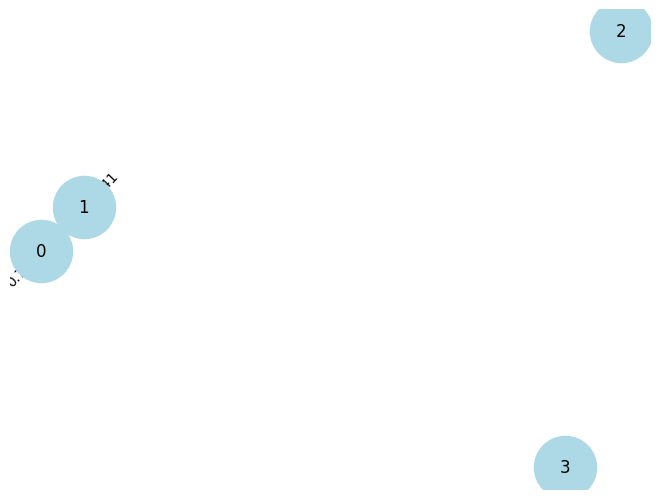

TOPSIS Scores:
Sentence 1: 0.2765758501334635
Sentence 2: 0.2765758501334635
Sentence 3: 0.2781591558317634
Sentence 4: 0.2675379260471539


In [5]:
import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Sample sentences
sentences = [
    "The quick brown fox jumps over the lazy dog",
    "A quick brown fox jumps over the lazy cat",
    "The brown fox is fast",
    "The dog and the cat are lazy"
]

# Preprocessing
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [token for token in tokens if token.isalnum() and token not in stopwords]
    return " ".join(tokens)

cleaned_sentences = [preprocess(sentence) for sentence in sentences]

# Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cleaned_sentences)

# Similarity Calculation
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# TOPSIS
def topsis(similarity_matrix):
    ideal_best = np.max(similarity_matrix, axis=1)
    ideal_worst = np.min(similarity_matrix, axis=1)
    normalized_matrix = similarity_matrix / np.sqrt(np.sum(similarity_matrix ** 2, axis=1))
    score_best = np.sum((normalized_matrix - ideal_best) ** 2, axis=1)
    score_worst = np.sum((normalized_matrix - ideal_worst) ** 2, axis=1)
    performance_score = score_worst / (score_best + score_worst)
    return performance_score

topsis_scores = topsis(similarity_matrix)

# Visualization
G = nx.Graph()
for i, sentence in enumerate(sentences):
    G.add_node(i, label=sentence)

for i in range(len(sentences)):
    for j in range(i+1, len(sentences)):
        similarity_score = similarity_matrix[i][j]
        if similarity_score > 0.5:  # Threshold for similarity
            G.add_edge(i, j, weight=similarity_score)

pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

# Print TOPSIS scores
print("TOPSIS Scores:")
for i, score in enumerate(topsis_scores):
    print(f"Sentence {i+1}: {score}")